In [ ]:
import pandas as pd

In [ ]:
#https://www.kaggle.com/datasets/ranitsarkar01/porter-delivery-time-estimation
df = pd.read_csv("gender_classification.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

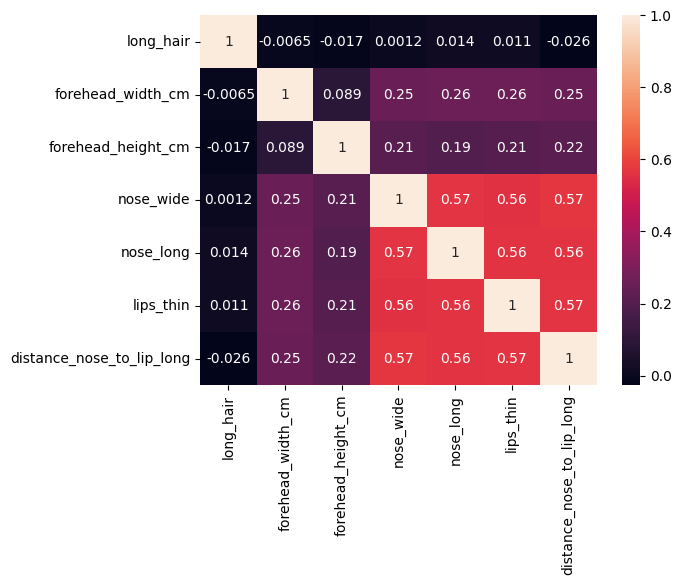

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

In [ ]:
#from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score


In [ ]:

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['gender'])
y = df['gender']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

In [ ]:
#!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

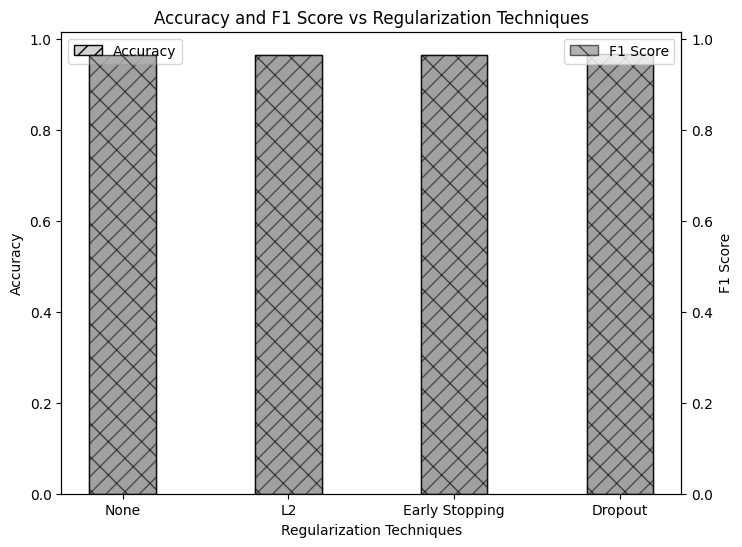

Accuracy without Regularization: 0.9660
F1 Score without Regularization: 0.9657
Accuracy with L2 Regularization: 0.9660
F1 Score with L2 Regularization: 0.9657
Accuracy with Early Stopping: 0.9660
F1 Score with Early Stopping: 0.9659
Accuracy with Dropout: 0.9680
F1 Score with Dropout: 0.9676


In [ ]:
# @title
# Train MLPClassifier without regularization
mlp_no_reg = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_no_reg.fit(X_train, Y_train)
y_pred_no_reg = mlp_no_reg.predict(x_test)
acc_no_reg = accuracy_score(y_test, y_pred_no_reg)
f1_no_reg = f1_score(y_test, y_pred_no_reg)

# Train MLPClassifier with L2 regularization
mlp_l2 = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.01, max_iter=500, random_state=42)
mlp_l2.fit(X_train,Y_train)
y_pred_l2 = mlp_l2.predict(x_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

# Train MLPClassifier with Early Stopping
mlp_early = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.01, max_iter=500, random_state=42, early_stopping=True)
mlp_early.fit(X_train, Y_train)
y_pred_early = mlp_early.predict(x_test)
acc_early = accuracy_score(y_test, y_pred_early)
f1_early = f1_score(y_test, y_pred_early)

# Train MLPClassifier with Dropout (simulated using high alpha)
mlp_dropout = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.1, max_iter=500, random_state=42)
mlp_dropout.fit(X_train, Y_train)
y_pred_dropout = mlp_dropout.predict(x_test)
acc_dropout = accuracy_score(y_test, y_pred_dropout)
f1_dropout = f1_score(y_test, y_pred_dropout)

# Compare metrics
labels = ['None', 'L2', 'Early Stopping', 'Dropout']
acc_values = [acc_no_reg, acc_l2, acc_early, acc_dropout]
f1_values = [f1_no_reg, f1_l2, f1_early, f1_dropout]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
width = 0.4

ax1.bar(labels, acc_values, width, label='Accuracy', hatch='//', color='lightgray', edgecolor='black')
ax2.bar(labels, f1_values, width, label='F1 Score', hatch='\\', color='gray', edgecolor='black', alpha=0.6)

ax1.set_xlabel('Regularization Techniques')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('F1 Score')
ax1.set_title('Accuracy and F1 Score vs Regularization Techniques')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# Print metrics
print(f"Accuracy without Regularization: {acc_no_reg:.4f}")
print(f"F1 Score without Regularization: {f1_no_reg:.4f}")
print(f"Accuracy with L2 Regularization: {acc_l2:.4f}")
print(f"F1 Score with L2 Regularization: {f1_l2:.4f}")
print(f"Accuracy with Early Stopping: {acc_early:.4f}")
print(f"F1 Score with Early Stopping: {f1_early:.4f}")
print(f"Accuracy with Dropout: {acc_dropout:.4f}")
print(f"F1 Score with Dropout: {f1_dropout:.4f}")

Without Built in

In [ ]:
model = keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history_no_reg = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8793 - loss: 0.3639 - val_accuracy: 0.9725 - val_loss: 0.0643
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.0706 - val_accuracy: 0.9725 - val_loss: 0.0677
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.0697 - val_accuracy: 0.9725 - val_loss: 0.0590
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9734 - loss: 0.0636 - val_accuracy: 0.9725 - val_loss: 0.0588
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0705 - val_accuracy: 0.9750 - val_loss: 0.0580
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9815 - loss: 0.0502 - val_accuracy: 0.9750 - val_loss: 0.0608
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0562 - val_accuracy: 0.9762 - val_loss: 0.0533
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9741 - loss: 0.0617 - val_accuracy: 0.

In [ ]:
y_pred_no_reg = model.predict(x_test).flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



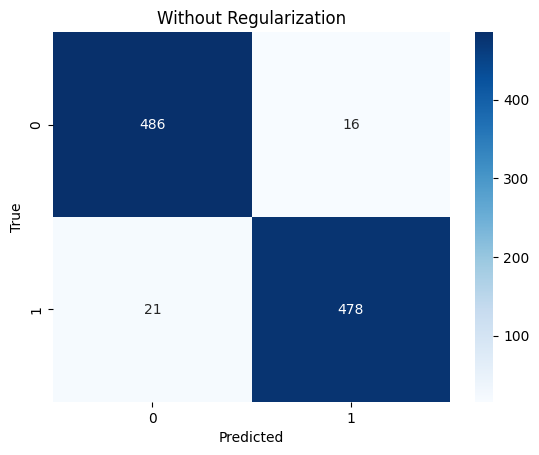

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
confm = confusion_matrix(y_test, y_pred_no_reg.round())
sns.heatmap(confm,cmap = 'Blues',annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Without Regularization")
print(classification_report(y_test,y_pred_no_reg.round()))

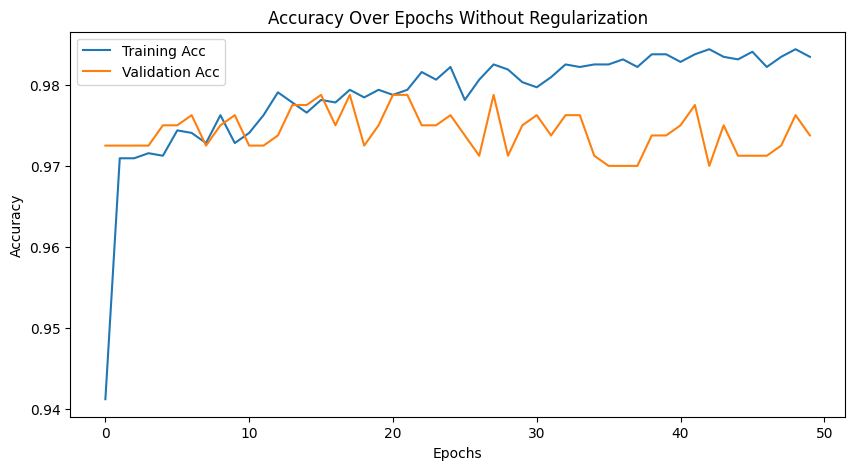

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_no_reg.history['accuracy'], label='Training Acc')
plt.plot(history_no_reg.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy Over Epochs Without Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8746 - loss: 1.4712 - val_accuracy: 0.9737 - val_loss: 0.5475
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9648 - loss: 0.4595 - val_accuracy: 0.9725 - val_loss: 0.2551
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9666 - loss: 0.2443 - val_accuracy: 0.9712 - val_loss: 0.1831
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9717 - loss: 0.1779 - val_accuracy: 0.9737 - val_loss: 0.1515
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.1470 - val_accuracy: 0.9737 - val_loss: 0.1394
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.1445 - val_accuracy: 0.9700 - val_loss: 0.1295
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.1386 - val_accuracy: 0.9712 - val_loss: 0.1288
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.1378 - val_accuracy: 0.

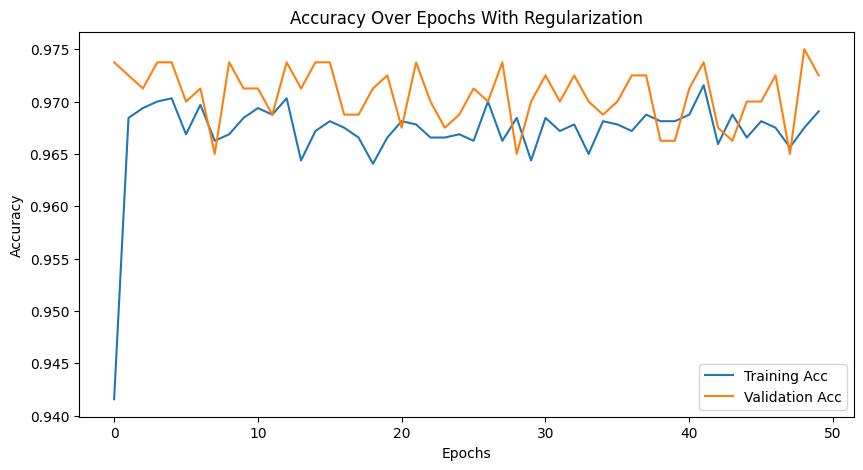

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       502
           1       0.96      0.98      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



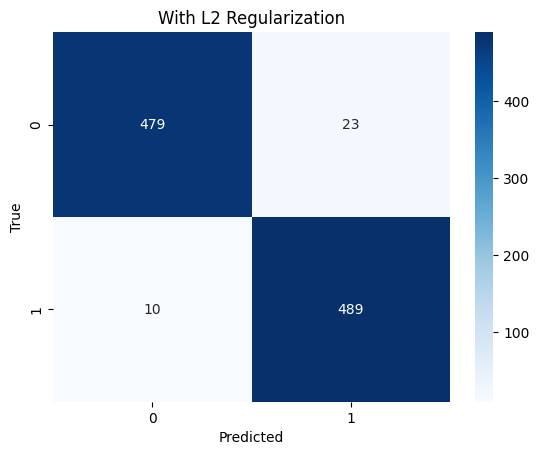

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Train the model
history = model1.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs With Regularization')
plt.show()

# Predictions
y_pred = model1.predict(x_test).flatten()
confm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(confm,cmap = 'Blues',annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("With L2 Regularization")
print(classification_report(y_test,y_pred.round()))